In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file = 'global_data_4_0.5'
time_bins = np.arange(0,24,float(file.split('_')[-1]))
H_bins = np.arange(90,130,float(file.split('_')[-2]))

shape = len(time_bins) * len(H_bins)

file_path = f'../../Output/{file}.csv'

In [3]:
data_df = pd.read_csv(file_path,low_memory=False)
Ne_EXP = np.array(data_df['EXP Density']).reshape(-1,shape)
dNe_EXP =  np.array(data_df['EXP Density Error']).reshape(-1,shape)
Ne_WACCM = np.array(data_df['WACCM Density']).reshape(-1,shape)
mag_EXP = np.array(data_df['EXP Magnitude']).reshape(-1,shape)
mag_WACCM = np.array(data_df['WACCM Magnitude']).reshape(-1,shape)
height = np.array(data_df['Height']).reshape(-1,shape)
time = np.array(data_df['Hours']).reshape(-1,shape)
Date = np.array(data_df['Date']).reshape(-1,shape)[:,0]
Svalbard = np.array(data_df ['Svalbard']).reshape(-1,shape)[:,0] == 1
Tromso = np.array(data_df['Tromso']).reshape(-1,shape)[:,0] == 1
Geomagnetic_Event = np.array(data_df['Geomagnetic Event']).reshape(-1,shape)[:,0] == 1
Solar_Proton_Event = np.array(data_df['Solar Proton Event']).reshape(-1,shape)[:,0] == 1
dst_index = np.array(data_df['DST Index']).reshape(-1,shape)
ddst_index = np.array(data_df['DST Index Gradient']).reshape(-1,shape)
hp30_index = np.array(data_df['Hp30 Index']).reshape(-1,shape)
dhp30_index = np.array(data_df['Hp30 Index Gradient']).reshape(-1,shape)
IMF_index = np.array(data_df['IMF']).reshape(-1,shape)
dIMF_index = np.array(data_df['IMF Gradient']).reshape(-1,shape)
SML_index = np.array(data_df['SML']).reshape(-1,shape)
dSML_index = np.array(data_df['SML Gradient']).reshape(-1,shape)
SMU_index = np.array(data_df['SMU']).reshape(-1,shape)
dSMU_index = np.array(data_df['SMU Gradient']).reshape(-1,shape)
SME_index = np.array(data_df['SME']).reshape(-1,shape)
dSME_index = np.array(data_df['SME Gradient']).reshape(-1,shape)
speed_index = np.array(data_df['Speed 1 hour before']).reshape(-1,shape)
dspeed_index = np.array(data_df['Speed Gradient 1 hour before']).reshape(-1,shape)

Ne_EXP_gradient_height = mag_EXP.reshape(-1, len(H_bins), len(time_bins))
zero_gradient_mask = Ne_EXP_gradient_height == 0
Ne_EXP_gradient_height = (Ne_EXP_gradient_height[:,1:,:] - Ne_EXP_gradient_height[:,:-1,:])/(H_bins[1]-H_bins[0])
Ne_EXP_gradient_height = np.concatenate((Ne_EXP_gradient_height, Ne_EXP_gradient_height[:,-1:,:]), axis=1)
Ne_EXP_gradient_height[np.roll(zero_gradient_mask,1,axis=1)] = Ne_EXP_gradient_height[np.roll(zero_gradient_mask,2,axis=1)]
Ne_EXP_gradient_height[np.roll(zero_gradient_mask,-1,axis=1)] = Ne_EXP_gradient_height[np.roll(zero_gradient_mask,-2,axis=1)]
Ne_EXP_gradient_height = Ne_EXP_gradient_height.reshape(-1,shape)

Ne_EXP_gradient_time = mag_EXP.reshape(-1, len(H_bins), len(time_bins))
zero_gradient_mask = Ne_EXP_gradient_time == 0
Ne_EXP_gradient_time = (Ne_EXP_gradient_time[:,:,1:] -  Ne_EXP_gradient_time[:,:,:-1])/time_bins[1]
Ne_EXP_gradient_time = np.concatenate((Ne_EXP_gradient_time, Ne_EXP_gradient_time[:,:,-1:]), axis=2)
Ne_EXP_gradient_time[np.roll(zero_gradient_mask,1,axis=1)] = Ne_EXP_gradient_time[np.roll(zero_gradient_mask,2,axis=1)]
Ne_EXP_gradient_time[np.roll(zero_gradient_mask,-1,axis=1)] = Ne_EXP_gradient_time[np.roll(zero_gradient_mask,-2,axis=1)]
Ne_EXP_gradient_time = Ne_EXP_gradient_time.reshape(-1,shape)


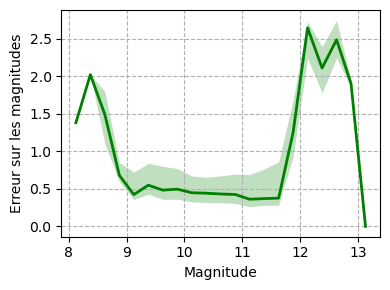

In [9]:
plt.figure(figsize=(4, 3))

mag_bins = np.linspace(8,13,21)

zero_mask = Ne_EXP != 0
Ne_EXP[~zero_mask] = 1

Ne_diff = np.abs(Ne_EXP - Ne_WACCM)
error_mask = Ne_diff < dNe_EXP

Ne_EXP[error_mask] = 1
dNe_EXP[error_mask] = 0

dNe_fac = dNe_EXP/Ne_EXP
factor_error_mask = dNe_fac > 2

Ne_EXP[factor_error_mask] = 1

zero_mask = Ne_EXP != 0
Ne_EXP[~zero_mask] = 1

value_mask = Ne_EXP != 1

Ne_diff_flat = np.abs(mag_EXP - mag_WACCM)[value_mask]
mag_flat = mag_EXP[value_mask]

mean_list = []
less_sigma_list = []
more_sigma_list = []

for mag_bin in mag_bins:
    mag_mask = np.abs(mag_flat - mag_bin) <= (mag_bins[1] - mag_bins[0])/2
    if len(Ne_diff_flat[mag_mask]) == 0:
        mean_value = 0
        less_sigma_value = 0
        more_sigma_value = 0
    else:
        mean_value = np.mean(Ne_diff_flat[mag_mask])
        less_sigma_value = np.std(np.concatenate((Ne_diff_flat[mag_mask][Ne_diff_flat[mag_mask]<mean_value], [mean_value])))
        more_sigma_value = np.std(np.concatenate((Ne_diff_flat[mag_mask][Ne_diff_flat[mag_mask]>mean_value], [mean_value])))
    mean_list.append(mean_value)
    less_sigma_list.append(less_sigma_value)
    more_sigma_list.append(more_sigma_value)

mean = np.array(mean_list)
less_sigma = np.array(less_sigma_list)
more_sigma = np.array(more_sigma_list)

x = np.array(mag_bins)

plt.fill_between(x + (mag_bins[1] - mag_bins[0])/2, mean-less_sigma, mean+more_sigma, color = 'green', alpha=.25, linewidth=0)
plt.plot(x + (mag_bins[1] - mag_bins[0])/2, mean, 'green', linewidth=2)
plt.grid(linestyle='--')

plt.xlabel(r'Magnitude')
plt.ylabel(r'Erreur sur les magnitudes')

plt.tight_layout()
plt.show()

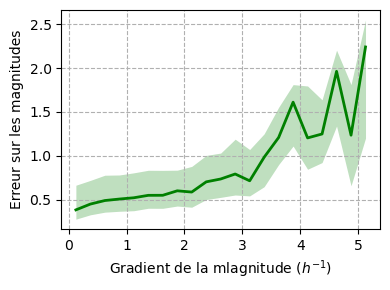

In [11]:
plt.figure(figsize=(4, 3))

gradient_bins = np.linspace(0,5,21)

zero_mask = Ne_EXP != 0
Ne_EXP[~zero_mask] = 1

Ne_diff = np.abs(Ne_EXP - Ne_WACCM)
error_mask = Ne_diff < dNe_EXP

Ne_EXP[error_mask] = 1
dNe_EXP[error_mask] = 0

dNe_fac = dNe_EXP/Ne_EXP
factor_error_mask = dNe_fac > 2

Ne_EXP[factor_error_mask] = 1

zero_mask = Ne_EXP != 0
Ne_EXP[~zero_mask] = 1

value_mask = Ne_EXP != 1

Ne_diff_flat = np.abs(mag_EXP - mag_WACCM)[value_mask]
gradient_flat = np.abs(Ne_EXP_gradient_time[value_mask])

mean_list = []
less_sigma_list = []
more_sigma_list = []


for gradient_bin in gradient_bins:
    gradient_mask = np.abs(gradient_flat - gradient_bin) <= (gradient_bins[1] - gradient_bins[0])/2
    if len(Ne_diff_flat[gradient_mask]) == 0:
        mean_value = 0
        less_sigma_value = 0
        more_sigma_value = 0
    else:
        mean_value = np.mean(Ne_diff_flat[gradient_mask])
        less_sigma_value = np.std(np.concatenate((Ne_diff_flat[gradient_mask][Ne_diff_flat[gradient_mask]<mean_value], [mean_value])))
        more_sigma_value = np.std(np.concatenate((Ne_diff_flat[gradient_mask][Ne_diff_flat[gradient_mask]>mean_value], [mean_value])))
    mean_list.append(mean_value)
    less_sigma_list.append(less_sigma_value)
    more_sigma_list.append(more_sigma_value)

mean = np.array(mean_list)
less_sigma = np.array(less_sigma_list)
more_sigma = np.array(more_sigma_list)

x = np.array(gradient_bins)

plt.fill_between(x + (gradient_bins[1] - gradient_bins[0])/2, mean-less_sigma, mean+more_sigma, color = 'green', alpha=.25, linewidth=0)
plt.plot(x + (gradient_bins[1] - gradient_bins[0])/2, mean, 'green', linewidth=2)
plt.grid(linestyle='--')

plt.xlabel(r'Gradient de la mlagnitude ($h^{-1})$')

plt.ylabel('Erreur sur les magnitudes')

plt.tight_layout()
plt.show()

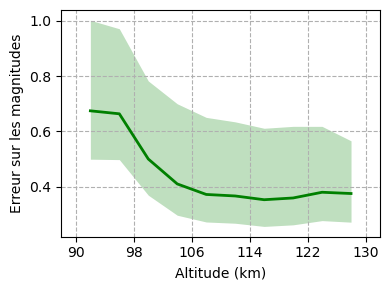

In [15]:
plt.figure(figsize=(4, 3))

zero_mask = Ne_EXP != 0
Ne_EXP[~zero_mask] = 1

Ne_diff = np.abs(Ne_EXP - Ne_WACCM)
error_mask = Ne_diff < dNe_EXP

Ne_EXP[error_mask] = 1
dNe_EXP[error_mask] = 0

dNe_fac = dNe_EXP/Ne_EXP
factor_error_mask = dNe_fac > 2

Ne_EXP[factor_error_mask] = 1

zero_mask = Ne_EXP != 0
Ne_EXP[~zero_mask] = 1

value_mask = Ne_EXP != 1

Ne_diff_flat = np.abs(mag_EXP - mag_WACCM)[value_mask]
height_flat = height[value_mask]

mean_list = []
less_sigma_list = []
more_sigma_list = []


for H_bin in H_bins:
    h_mask = height_flat == H_bin
    mean_value = np.mean(Ne_diff_flat[h_mask])
    mean_list.append(mean_value)
    less_sigma_list.append(np.std(Ne_diff_flat[h_mask][Ne_diff_flat[h_mask]<mean_value]))
    more_sigma_list.append(np.std(Ne_diff_flat[h_mask][Ne_diff_flat[h_mask]>mean_value]))

mean = np.array(mean_list)
less_sigma = np.array(less_sigma_list)
more_sigma = np.array(more_sigma_list)
    
x = np.array(H_bins)

plt.fill_between(x + (H_bins[1] - H_bins[0])/2, mean-less_sigma, mean+more_sigma, color = 'green', alpha=.25, linewidth=0)
plt.plot(x + (H_bins[1] - H_bins[0])/2, mean, 'green', linewidth=2)
plt.grid(linestyle='--')

plt.xlabel('Altitude (km)')
plt.xticks(np.concatenate((np.arange(90,130,8),[130])))
plt.xlim((88, 132))

plt.ylabel('Erreur sur les magnitudes')
plt.tight_layout()
plt.show()